# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Vaidehi Sonar</font>

# Introduction

The objective of this assignemnt is to implement and understand Linear Regression. This is achieved by understanding the data, pre-processing it, visualizing and observing it to find any correlation and then using the different models to perform linear regression. Linear regression is implemented by using two methods namely Least Squares and Least Mean Squares.after implementation, by analysing the outcomes various insights about the data can be understood.


# Data

It is dataset that contains house sale prices for King County, which includes Seattle. It includes homes that were sold between May 2014 and May 2015. It has been taken from Kaggle. It has 21 features out of which 19 are house features and the remaining are id and the target value i.e. the price. The dataset consists of 21k+ data samples. Following are the features:<br/>
**id**: a notation for a house<br/>
**date**: Date house was sold<br/>
**price**: Price is prediction target<br/>
**bedrooms**: Number of Bedrooms/House<br/>
**bathrooms**: Number of bathrooms/House<br/>
**sqft_living**: square footage of the home<br/>
**sqft_lotsquare**: footage of the lot<br/>
**floorsTotal**: floors (levels) in house<br/>
**waterfront**: House which has a view to a waterfront<br/>
**view**: Has been viewed<br/>
**condition**: How good the condition of the house is ( Overall )<br/>
**grade**: overall grade given to the housing unit, based on King County grading system<br/>
**sqft_above**: square footage of house apart from basement<br/>
**sqft_basement**: square footage of the basement<br/>
**yr_built**: Year when house was built<br/>
**yr_renovated**: Year when house was renovated<br/>
**zipcode**: zipcode<br/>
**lat**: Latitude coordinate<br/>
**long**: Longitude coordinate<br/>
**sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area<br/>
**sqft_lot15**: lotSize area in 2015(implies-- some renovations)<br/>

### Pre-processing

Data is clean and pre-processed.

In [6]:
import numpy as np 
from abc import ABC, abstractmethod
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

reg_df = pd.read_csv('kc_house_data.csv')


In [7]:
reg_df.info()
reg_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


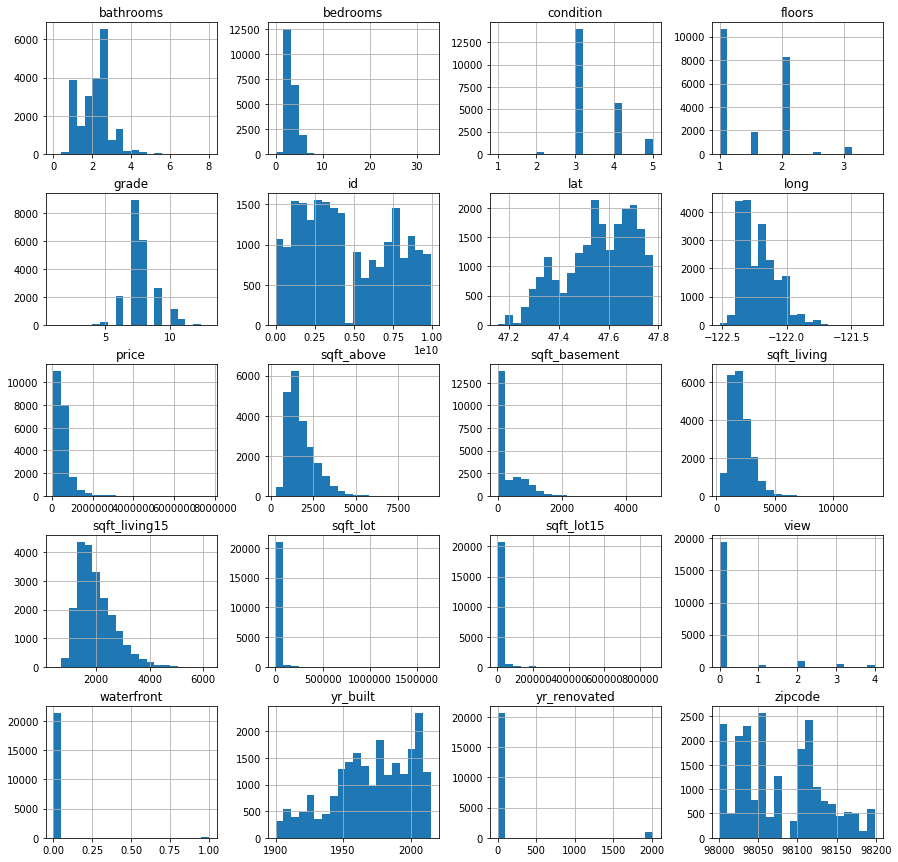

In [8]:
reg_df.hist(bins=20,figsize=(15,15)) 
plt.show()

In [9]:
corr_matrix=reg_df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


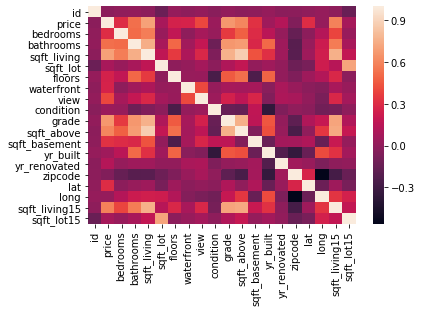

In [10]:
ht_map=sns.heatmap(corr_matrix)

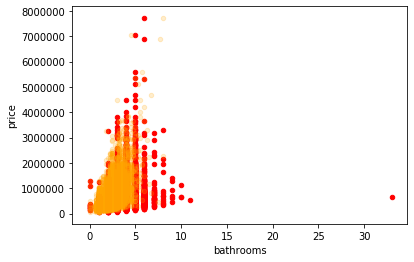

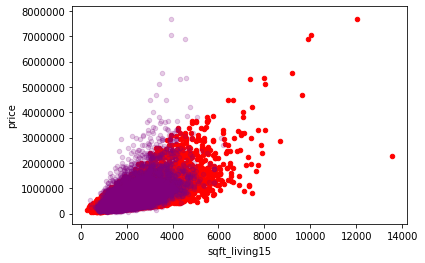

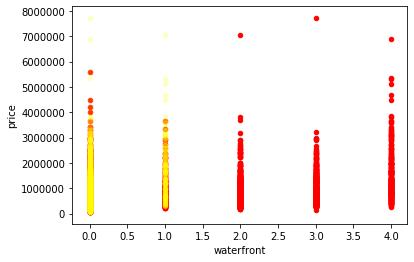

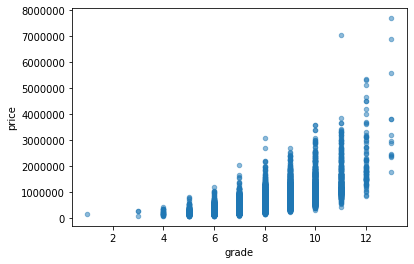

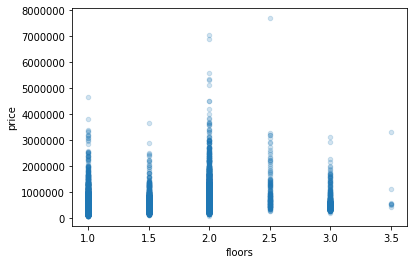

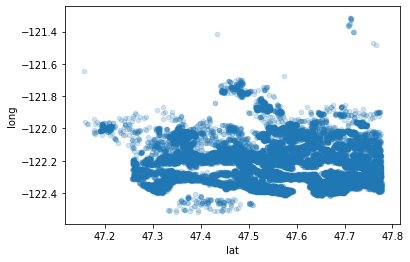

In [11]:
ax1 = reg_df.plot(kind='scatter', x='bedrooms', y='price', color='r')    
ax2 = reg_df.plot(kind='scatter', x='bathrooms', y='price', color='orange', alpha=0.2,ax=ax1)    
ax3 = reg_df.plot(kind='scatter', x='sqft_living', y='price', color='r')    
ax4 = reg_df.plot(kind='scatter', x='sqft_living15', y='price', color='purple',alpha=0.2, ax=ax3)    
ax5 = reg_df.plot(kind='scatter', x='view', y='price', color='r')    
ax6 = reg_df.plot(kind='scatter', x='waterfront', y='price', color='yellow',alpha=0.2, ax=ax5) 
reg_df.plot(kind="scatter",x="grade",y="price", alpha=0.5 )
reg_df.plot(kind="scatter",x="floors",y="price", alpha=0.2 )
reg_df.plot(kind="scatter",x="lat",y="long", alpha=0.2)

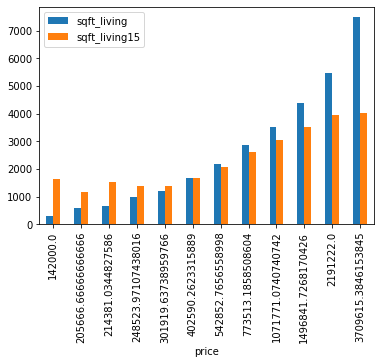

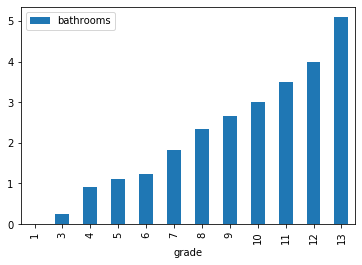

In [12]:
reg_df1=reg_df.groupby(['grade']).mean()
bar = reg_df1.plot.bar(x='price',y=['sqft_living','sqft_living15'])
bar1 = reg_df1.plot.bar(y='bathrooms')

### Preliminary Observation

#### Heat Map or correlation matrix:

- It is observed that there is quite strong correlation between number of bathrooms and grade. Features like bathrooms, bedrooms, grade, sqft_living before and after renovation are relevant to price change for the houses.
- Features like condition of the house, year built, zipcode does not affect the price much.
- Correlation is also observed between number of floors,bathrooms and year built.


#### Histograms:

- Many hsitograms are tail-heavy. They extend much further to the right of the median than to the left.

#### Scatter Plots:

- The prices of houses are for 2-5bedrroms and 1-4 bathrooms lie between the range 1000000-4000000.
- It seems like price is linearly dependent on Sqft_living i.e as the sqft increases price increases. It is still linearly increasing even after renovation given by sqft_living15.
- Grade and price is not a linear relation. It is a polynomial curve with one or two outliers.
- Most of the houses are located at the latitude between 47.25 and 47.75 and between longitude -122.4 and -121.8 with some outliers. 
- Waterfront houses does not have any relevance in price prediction. Although prices for view and waterfront houses seem to overlap.

#### Bar Plot:

- It compares the price change before and after renovation.
- An interesting pattern that can be seen is that before renovation/without renovation the price of the houses increases pretty drastically with respect to sqft_living whereas after renovation the prices increase more gradually with sqft_living.
- It can be seen that grade is linearly dependent on number of bathrooms.As number of bathroom increases grade also increases.


## Method

### Review

In Regression, the target values are Real numbers. In this assignemnt, we aim to find a linear model that is best fit to the regression data.When the data is linear or when we need simple solution, the linear model can suggest better solutions.<br>

$$\displaystyle 
f(x;w)=w_1x+w_0.$$
<br>For multiple inputs,
$$\displaystyle
f(x;w)=w_Dx_D+⋯+w_1x_1+w$$

Finding best fit means minimizing error Function.
$$\displaystyle E(w)=\sum_{i=1}^{N}(f(x_i;w_i)−t_i)^2$$

**Least Squares:**
In Least Squares we try minimizinng the above error function by taking the derivative of the quadratic equation and equating it to 0, which gives the following result.

$$\displaystyle
w=(X^⊤X)^{−1}X^⊤t $$

The least squares use all the available data for training or finding the best fit.<br>

**Least Mean Squares:**
When data is sufficiently large, we can perform sequential or online learning. During the online learning process, data points are introduced one by one, and the parameters are updated accordingly. Using the updated parameters, it makes a new estimation and repeat these steps.<br>

It is represented as,
$$\displaystyle w^{k+1}=w^k−α∇E_k $$

This is called stochastic gradient descent or sequential gradient descent.
We calculate the gradient i.e. $\displaystyle∇E_k$ and ﬁnally get,

$$
 w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$


### Code Explaination and implementation
The LinearModel class is inherited by two classes LinearRegress and LMS. Linear Regress is used for Least Squares and LMS is used for Least Mean Squares. A base class BaseModel is implemented which is having only two abstract method 'train' and 'use', and they are deﬁned further in diﬀerent classes which are inheriting BaseModel class.


In [13]:


# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

The LinearRegress class is for Least Squares.There are two functions train and use. The least square function from numpy library is used to calculate weights in the train function. The use function returns the dot product of the weight and the input data.


The parameter that gives best fit will be

$$ wv^* = \arg\min_wv \sum_{i=1}^{N} \Big( f(xv_i; wv) - t_i \Big)^2 $$


In [14]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        ## TODO: replace this with your codes
        X= self.add_ones(X) 
        self.w = np.linalg.lstsq(X.T @ X , X.T @ T , rcond = -1)[0]
    
    # apply the learned model to data X
    def use(self, X):
        ## TODO: replace this with your codes
        X=self.add_ones(X)
        return X @ self.w

### Least Mean Squares

$$
 w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
 $$
In this model,  train, train_step and use are the functions that are implemented. The use function for LMS class is similar to that of the LinearRegress class. The train function calls the train_step function to update the weights.Function train_step is used for a particular step function of train. The train_step takes one instance and the corresponding target value as an input. The following equation is used to update the weights in the train_step function.
Thus, the weight values are obtained in LMS.

$$\begin{align*}
  f(x;w) &amp;= w^Tx = \sum_0^D w_i x_i \\
     &amp;= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}$$

In [15]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
       
        for x, t in zip(X, T):
                self.train_step(x,t)
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        
        m=t.size
        #h = x @ self.w.T
        h = self.w.T @ x
        h=h-t
        self.w =self.w - (self.alpha * h * x)

        
        #pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)

        x = self.add_ones(X).T
        y = self.w.T @ x
        
        return y.T
        
        #pass  ## TODO: replace this with your codes
        

## Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs.

In [16]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


## Experiments

## Partition Function

This function divides the data into training and testing datasets and returns.

In [17]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [18]:
X = np.array(reg_df[['bedrooms','bathrooms','sqft_living','grade','lat','long','sqft_living15','floors','yr_built']])
T = np.array(reg_df[['price']])

In [26]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [20]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]


F:\Ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Least Squares

In the cell, we are creating an object of LinearRegress class, which is further used to call its function. First 'train' method is called in which we are passing our training datasets(Splitted above) to train the model .It will calculate the best possible weight according to the data. Then, 'use' method is called in which we are passing our test dataset on which it is calculating target values based on the weights calculated in previous method and further these predicted value be comapred with actual test values splitted above.<br>
Visualization is performed below.


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

218514.49551889277

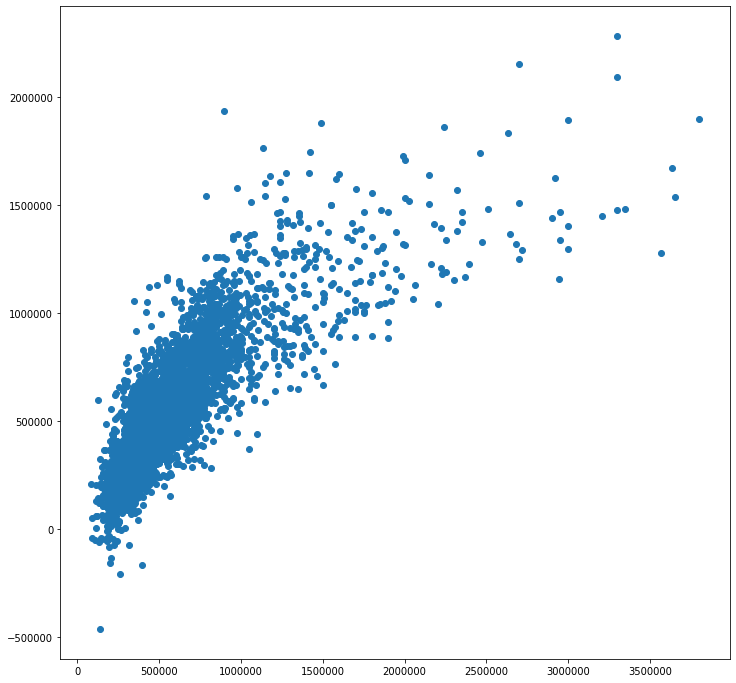

In [22]:
plt.rcParams['figure.figsize'] = [12, 12]

ls = LinearRegress()
ls.train(Xtrain, Ttrain)
y_ls= ls.use(Xtest)
plt.scatter(Ttest,ls.use(Xtest))
np.sqrt(np.mean((Ttest - y_ls)**2))


### Least Mean Squares

In this call below, we are creating LMS object (lms), with its help we are calling its 'train_step' method in which we are passing our training datasets. Further, we are calling its 'use' function. Here alpha value is taken as 0.000001 after trying out different alpha values.

F:\Ana\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in matmul
F:\Ana\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in matmul
F:\Ana\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in matmul
F:\Ana\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in subtract
F:\Ana\lib\site-packages\matplotlib\ticker.py:2036: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


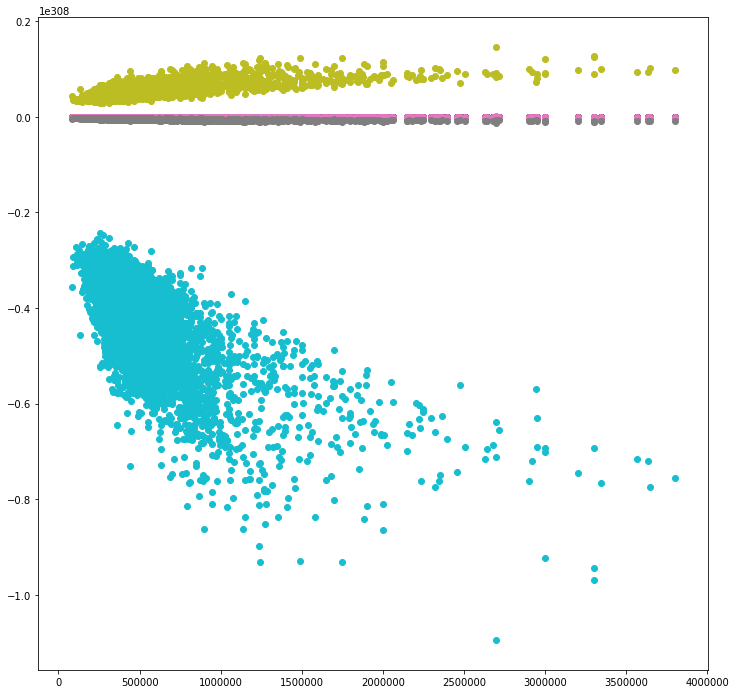

In [23]:
#The graph takes about 20 mins to plot. It is working.

lms = LMS(0.000001)
for x, t in zip(Xtrain, Ttrain):
    lms.train_step(x, t)
    y_lms = lms.use(Xtest)
    plt.scatter(Ttest, lms.use(Xtest)) 


    

From the code's perspective, Least Square class(LinearRegress) has 'train' method which is accepting feature matrix and Target vector and based on them, it calculates the weight vector and it is stored in class variable(self.w). Further, 'use' method calulates the ﬁnal predicted values by dot product of feature matrix and weight vector(self.w) and ﬁnally returned that predicted vector.<br>
Wheareas,in Least mean Squares, in 'train' method, it is just iterating over the data samples in our dataset and for each sample it is calling 'train_step'. In 'train_step' method, it is accepting single sample vector and it estimates weight new vector with the help of previous weight vector and at the end it gives us ﬁnal weight vector. 'use' method estimates the ﬁnal vector of predicted value.

### Analysis of Algorithms

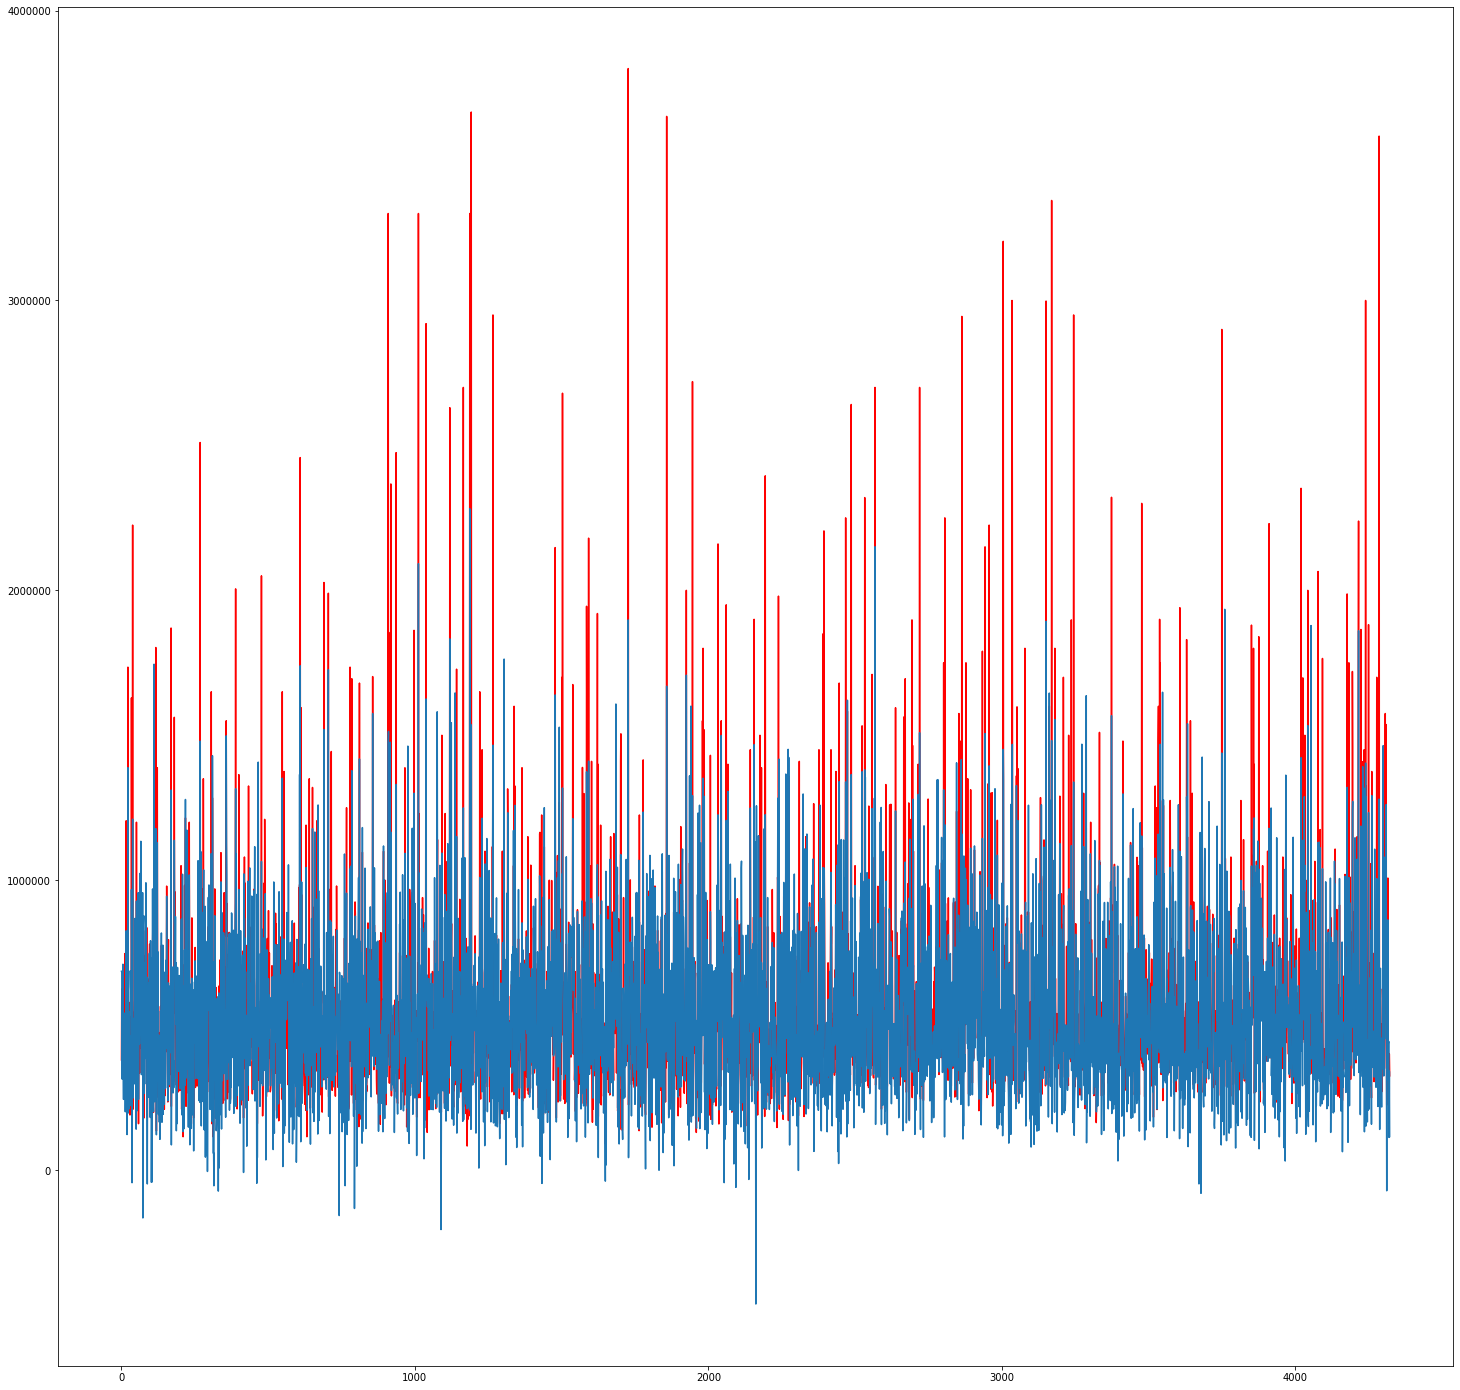

In [24]:
plt.figure(figsize=(25,25)) 
plt.plot(Ttest,'r') 
plt.plot(y_ls)

The above plot is between our actual values of our dependent variable(Ttest) and the values predicted by our model for LS. The values in 'Red' color reperesents our Ttest values and values in blue points are predicted values by our model.There does not seem to be way too much of a difference between actual values and predicted values even as compared with LS method. The extereme points in the graph can be because of the outliers. The accuracy seems to be okay.The RMSE value is 218514.49551889277.

The main difference between Least Squares and Least Mean Squares is that LS is batch learning and LMS is online learning. Least squares is more accurate but it is computationally expensive as it requires computing an inverse matrix. The weights are calculated in one go. Whereas, in LMS the weights are updated as new instances are added to the input data.

Least square statistical technique for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve. The sum of the squares of the offsets is used instead of the offset absolute values because this allows the residuals to be treated as a continuous differentiable quantity. However, because squares of the offsets are used, outlying points can have a disproportionate effect on the fit, a property which may or may not be desirable depending on the problem at hand.

# Conclusions

The challenges in this assignment was to understand the algorithms and to work with the dataset to pass all the tests that were given. In this assignment, I have learned to implement linear regression using Least Squares and to work and analyze the dataset more efficiently. I have learned that visualization of dataset and results is really an important step while working with any dataset. Analyzing the results can tell you how a model will fit the data and which model is fit for which kind of data.Moreover, it might help you in fine tuning your model. Predictions will give various insights about the dataset which can be quite useful.

# References


- Professor's Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb
- Dataset : https://www.kaggle.com/harlfoxem/housesalesprediction
- Pandas : https://pandas.pydata.org/
- Plotting Heatmaps : https://seaborn.pydata.org/
- Seaborn : https://seaborn.pydata.org/
- Hands on Machine Learning with Scikit Learn and Tensorflow
- https://www.quora.com/What-is-the-difference-between-LMS-Least-mean-square-and-LS-Least-Square